<a href="https://colab.research.google.com/github/EmmanuelRamos143/AA/blob/main/Tarea3_8pts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3 aprendizaje automatico


Carga inicial de datos.

In [1]:

import sys
sys.path.append('/content/HeartAttack.py')
from HeartAttack import *

heart_df = HeartAttackHelper.obtainHearthDF()

display(Markdown(heart_df.head().to_markdown()))



|    |   age |   sex |   cp |   trtbps |   chol |   fbs |   restecg |   thalachh |   exng |   oldpeak |   slp |   caa |   thall |   output |
|---:|------:|------:|-----:|---------:|-------:|------:|----------:|-----------:|-------:|----------:|------:|------:|--------:|---------:|
|  0 |    63 |     1 |    3 |      145 |    233 |     1 |         0 |        150 |      0 |       2.3 |     0 |     0 |       1 |        1 |
|  1 |    37 |     1 |    2 |      130 |    250 |     0 |         1 |        187 |      0 |       3.5 |     0 |     0 |       2 |        1 |
|  2 |    41 |     0 |    1 |      130 |    204 |     0 |         0 |        172 |      0 |       1.4 |     2 |     0 |       2 |        1 |
|  3 |    56 |     1 |    1 |      120 |    236 |     0 |         1 |        178 |      0 |       0.8 |     2 |     0 |       2 |        1 |
|  4 |    57 |     0 |    0 |      120 |    354 |     0 |         1 |        163 |      1 |       0.6 |     2 |     0 |       2 |        1 |

## Estadistica Descriptiva basica en datos


Obtencion de Quantiles, STD, media, minimos y maximos

In [2]:
display(Markdown(heart_df.describe().to_markdown()))

|       |      age |        sex |         cp |   trtbps |     chol |        fbs |    restecg |   thalachh |       exng |   oldpeak |        slp |        caa |      thall |     output |
|:------|---------:|-----------:|-----------:|---------:|---------:|-----------:|-----------:|-----------:|-----------:|----------:|-----------:|-----------:|-----------:|-----------:|
| count | 303      | 303        | 303        | 303      | 303      | 303        | 303        |   303      | 303        | 303       | 303        | 303        | 303        | 303        |
| mean  |  54.3663 |   0.683168 |   0.966997 | 131.624  | 246.264  |   0.148515 |   0.528053 |   149.647  |   0.326733 |   1.0396  |   1.39934  |   0.729373 |   2.31353  |   0.544554 |
| std   |   9.0821 |   0.466011 |   1.03205  |  17.5381 |  51.8308 |   0.356198 |   0.52586  |    22.9052 |   0.469794 |   1.16108 |   0.616226 |   1.02261  |   0.612277 |   0.498835 |
| min   |  29      |   0        |   0        |  94      | 126      |   0        |   0        |    71      |   0        |   0       |   0        |   0        |   0        |   0        |
| 25%   |  47.5    |   0        |   0        | 120      | 211      |   0        |   0        |   133.5    |   0        |   0       |   1        |   0        |   2        |   0        |
| 50%   |  55      |   1        |   1        | 130      | 240      |   0        |   1        |   153      |   0        |   0.8     |   1        |   0        |   2        |   1        |
| 75%   |  61      |   1        |   2        | 140      | 274.5    |   0        |   1        |   166      |   1        |   1.6     |   2        |   1        |   3        |   1        |
| max   |  77      |   1        |   3        | 200      | 564      |   1        |   2        |   202      |   1        |   6.2     |   2        |   4        |   3        |   1        |

Obtencion de Mediana


In [11]:
print(heart_df.apply(np.median, axis=0))


age          55.0
sex           1.0
cp            1.0
trtbps      130.0
chol        240.0
fbs           0.0
restecg       1.0
thalachh    153.0
exng          0.0
oldpeak       0.8
slp           1.0
caa           0.0
thall         2.0
output        1.0
dtype: float64


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Obtencion de moda.

In [12]:
heart_df.mode(dropna=True)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Obtencion de matriz de correlaciones.

In [3]:
heart_df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Dado el tamano de la matriz de correlaciones , usamos un heat map para hacerlo mas intuitivo.


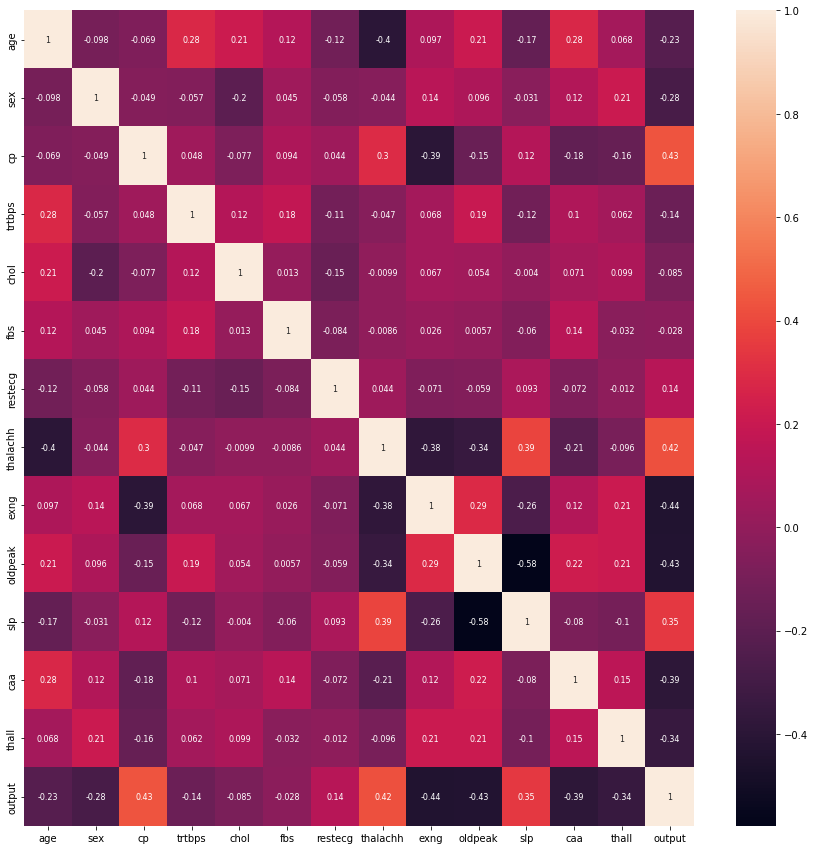

In [14]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(heart_df.corr(), annot=True, annot_kws={"size": 8
                                                    })

**Observaciones en matriz de correlaciones**: _Se observo que existen correlaciones tanto como positivas y negativas dentro del heatmap. En ninguna de la variables se presento una fuerte correlacion **(> 0.8)** dentro de las variables.
Se describiran algunas de las correlaciones entre algunas de las variables._

*   Chest Pain Type (CP) y variable de respuesta (output), Esta tiene un coeficiente de correlacion postivo de **0.43**, el cual se podria considerar un valor moderado, este tipo de relacion tiene sentido ya que indica el tipo de angina de pecho el cual se esta tratando.
*   Thalachh y variable Age. Esta tiene un coeficiente de correlacion  negativo de **-0.4**, el cual se entiende ya que a mayor edad la taza maxima de latidos disminuye, esto en base a la prueba Thalium Stress Test result.
*   Chol (Serum cholestoral in mg/dl) y variable Age, Esta tiene un coeficiente de correlacion positiva de **0.21** la cual se considera una baja o debil correlacion. 
* Exng y variable de respuesta (output), Esta tiene un coeficiente de correlacion negativo de **-0.44**, Se trata de la relacion entre la angina de pecho inducida por ejercicio y la variable de respuesta. 


Links de referencia consultados para variables de interes:
[Thalium Stress Test](https://www.mountsinai.org/health-library/tests/nuclear-stress-test)
[DataSet information](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)




